In [5]:
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Categories = ['angry', 'embarrassed', 'happy', 'sad', 'shock']
flat_data_arr = []  # input array
target_arr = []  # output array
datadir = 'veri_seti/'
w,h = 100,100
# Path which contains all the categories of images
for category in Categories:
    print(f'loading... category : {category}')
    path = os.path.join(datadir, category)
    for img_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_name))
        # Convert the image to grayscale
        img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_array_gray, (w, h))  # Resize the image
        flat_data_arr.append(img_resized)  # Append the resized grayscale image
        target_arr.append(Categories.index(category))
    print(f'loaded category: {category} successfully')

# Convert lists to numpy arrays
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

# Reshape flat data to have a single channel and replicate it to match the expected three channels
flat_data = np.expand_dims(flat_data, axis=-1)
flat_data = np.repeat(flat_data, 3, axis=-1)

# One-hot encode target variable
onehot_encoder = OneHotEncoder(sparse=False)
target_encoded = onehot_encoder.fit_transform(target.reshape(-1, 1))

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(flat_data, target_encoded, test_size=0.20, random_state=77, stratify=target_encoded)


loading... category : angry
loaded category: angry successfully
loading... category : embarrassed
loaded category: embarrassed successfully
loading... category : happy
loaded category: happy successfully
loading... category : sad
loaded category: sad successfully
loading... category : shock
loaded category: shock successfully


c:\Users\Yavuz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint

# Assuming (w, h) is defined and x_train, y_train, x_test, y_test are preprocessed

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(w, h, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks to save the best model during training
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), callbacks=[checkpoint])

# Load the best model saved during training
best_model = load_model('best_model.keras')

# Evaluate the best model
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Epoch 1/150


c:\Users\Yavuz\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1821 - loss: 233.8934
Epoch 1: val_accuracy improved from -inf to 0.21782, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.1835 - loss: 225.4059 - val_accuracy: 0.2178 - val_loss: 1.6242
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2742 - loss: 1.6120
Epoch 2: val_accuracy improved from 0.21782 to 0.23762, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2746 - loss: 1.6101 - val_accuracy: 0.2376 - val_loss: 1.6603
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3108 - loss: 1.7333
Epoch 3: val_accuracy improved from 0.23762 to 0.25743, saving model to best_model.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3108 - loss: 1.7976 - val_accuracy: 0.2574 - val_loss: 1.7303
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4177 - loss: 1.7615
Epoch 4: val_accuracy did not improve from 0.25743
1

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.50      0.43      0.46        21
 embarrassed       0.25      0.25      0.25        20
       happy       0.55      0.60      0.57        20
         sad       0.56      0.45      0.50        20
       shock       0.56      0.70      0.62        20

    accuracy                           0.49       101
   macro avg       0.48      0.49      0.48       101
weighted avg       0.48      0.49      0.48       101



<Figure size 800x600 with 0 Axes>

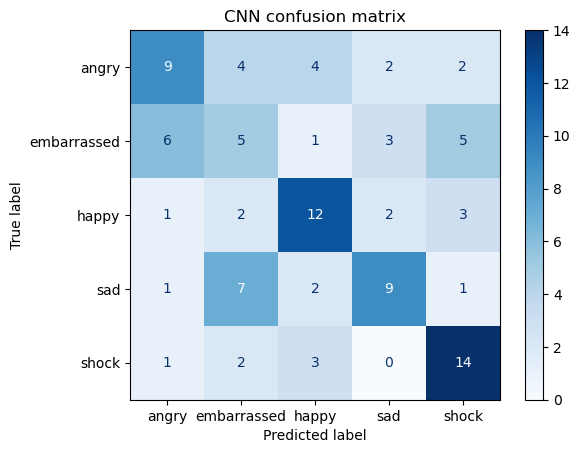

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
y_pred = best_model.predict(x_test)

# Convert one-hot encoded labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=Categories))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=Categories)
disp.plot(cmap=plt.cm.Blues)
plt.title('CNN confusion matrix')
plt.show()


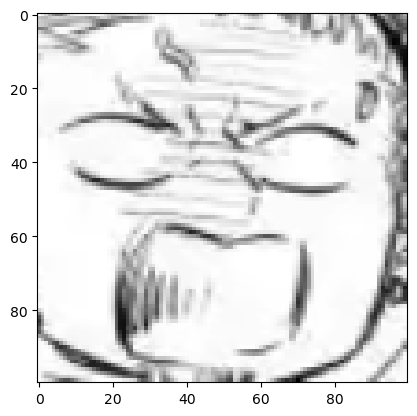

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
angry = 18.644556403160095%
embarrassed = 1.2354612350463867%
happy = 46.34821116924286%
sad = 5.421567335724831%
shock = 28.35020124912262%
The predicted image is: happy


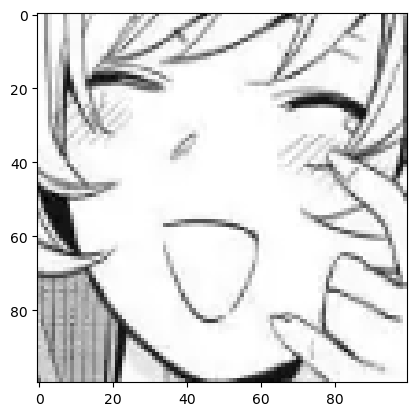

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
angry = 0.8352563716471195%
embarrassed = 39.00549113750458%
happy = 12.342484295368195%
sad = 22.58795201778412%
shock = 25.228816270828247%
The predicted image is: embarrassed


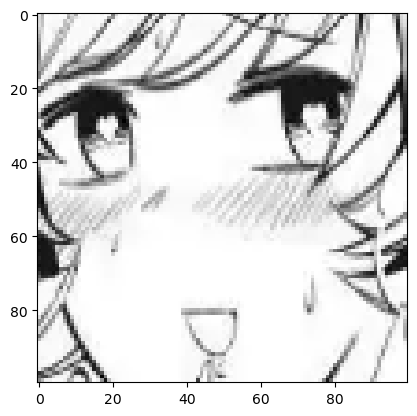

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
angry = 0.011126216122647747%
embarrassed = 62.55549192428589%
happy = 0.0005769333711214131%
sad = 36.5383118391037%
shock = 0.8944851346313953%
The predicted image is: embarrassed


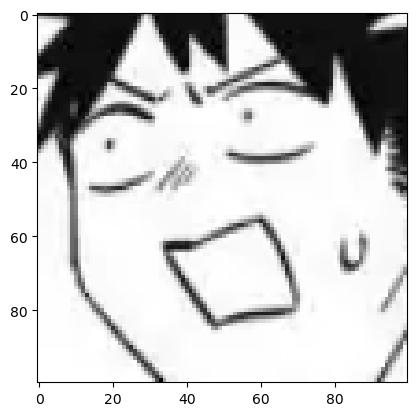

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
angry = 79.83912825584412%
embarrassed = 0.0006478768227680121%
happy = 0.7404576055705547%
sad = 18.140073120594025%
shock = 1.279692631214857%
The predicted image is: angry


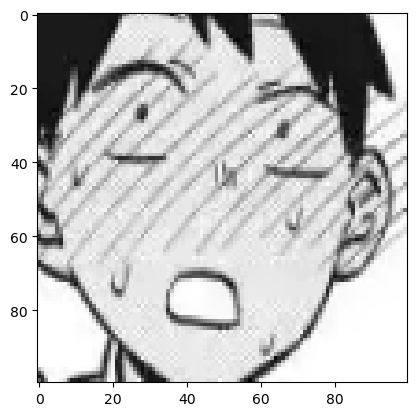

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
angry = 0.0019699489712365903%
embarrassed = 1.1425734669501253e-05%
happy = 97.95143604278564%
sad = 4.3556264017752255e-05%
shock = 2.0465360954403877%
The predicted image is: happy


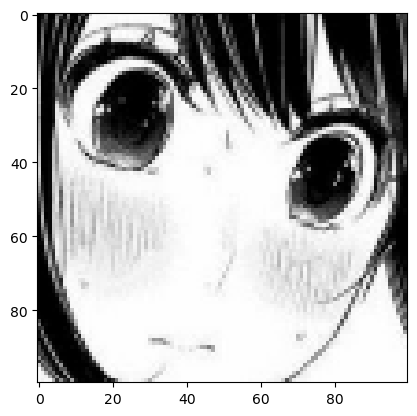

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
angry = 3.272265474535928e-12%
embarrassed = 100.0%
happy = 4.794350333403585e-09%
sad = 1.0972436292888688e-07%
shock = 1.65234670390646e-07%
The predicted image is: embarrassed


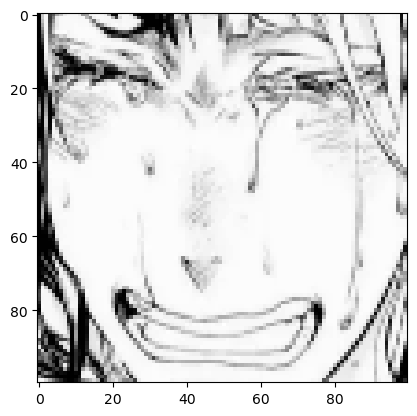

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
angry = 6.101500615477562%
embarrassed = 0.18218160839751363%
happy = 3.5355478525161743%
sad = 70.30069828033447%
shock = 19.880075752735138%
The predicted image is: sad


In [14]:
path = 'veri_seti/guess'

# Iterate over each image file in the folder
for img_name in os.listdir(path):
    # Load the image
    img_array = cv2.imread(os.path.join(path, img_name))

    # Convert the image to grayscale
    img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

    # Resize the image
    img_resized = cv2.resize(img_array_gray, (w, h))

    plt.imshow(img_resized, cmap='gray')  # Display the grayscale image
    plt.show()

    # Preprocess the image for prediction
    img_preprocessed = np.stack((img_resized,) * 3, axis=-1)
    img_preprocessed = img_preprocessed.reshape(1, w, h, 3)
    # Predict probabilities for each class
    probability = best_model.predict(img_preprocessed)

    # Print predicted probabilities for each class
    for ind, val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')

    # Get the predicted class index
    predicted_class_index = probability.argmax()
    predicted_category = Categories[predicted_class_index]
    print("The predicted image is:", predicted_category)
